# Projeto: Será que Machine Learning pode quebrar a banca? #

<p align="center">
  <img src="pexels-photo-3279691.jpeg" >
</p>

Blackjack é um dos jogos mais simples que você pode jogar em um Casino.
As regras são simples, você joga contra a banca e ambos começam com duas cartas, a soma destas cartas precisa ser abaixo ou igual a 21, sendo que o jogador mais perto de 21 ganha e quem tiver mais que 21 "estoura" e automaticamente perde.
Para começar um projeto de Machine Learning preciso criar um jogo de Blackjack em python e simular um jogador usando diferentes estratégias de jogo.
Este projeto vai ficar mais complexo com o tempo, adicionando mais de um jogador, mistura de estratégias, apostas e finalmente a construção de um modelo de ML que vai jogar do melhor jeito possível de acordo com as cartas na mesa e a estratégia adotada.
Também vou analisar os dados explorando as variáveis relacioandas ao jogo, como quantidade de baralhos em nosso deck, quantidade de jogadores, etc...

Me sinto na obrigação de dizer que **esse projeto visa somente avaliar as capacidades da Inteligência Artificial em um jogo de azar. Jogos de azar não são investimento e cassino não é caridade. A banca SEMPRE tem a vantagem mesmo usando várias 'técnicas' e macetes. Esse código NÃO deve ser usado em cassinos e só tem fins acadêmicos.**

Primeiro, precisamos programar o jogo:

Fazendo as funções do jogo:

In [3]:
import pandas as pd
import numpy as np
import random

#Checa a mão somando os valores e dá como output o valor da soma
def sum_hand(hand):
    d_val = {'2': 2, '3': 3, '4': 4, '5': 5,
     '6': 6, '7': 7, '8': 8, '9': 9, '10': 10,
     'J': 10, 'Q': 10, 'K': 10, 'A': 11, 'A.': 1}

    soma = sum(d_val[str(k)] for k in hand)
    return soma
#Cria o nosso "shoe", que é o baralho que vai ser utilizado
def create_shoe(n_decks=6):
    deck = [2,3,4,5,6,7,8,9,10,'J','Q','K','A']
    shoe = deck*4*n_decks
    random.shuffle(shoe)
    return shoe

#Função de comprar cartas
def deal_cards(hand,shoe,n_cards=1):
    for i in range(n_cards):
        hand.append(shoe.pop())
    return hand

#Checa se você estourou ou automaticamente ganhou
def check_hand(hand):
    if sum_hand(hand) > 21:
        hand = ace_of_spades(hand)
        if sum_hand(hand) > 21:
            return 'bust'
        else:
            return 'keep'
    elif sum_hand(hand) == 21:
        return 'win'
    else:
        return 'keep'

#Imprime os resultados, somente para conferencia
def print_results(d_hand,p_hand):
    return
    #print('\n Mão da banca: ', d_hand,' valendo',sum_hand(d_hand), ' pontos.' '\n Sua mão:', p_hand , ' valendo', sum_hand(p_hand) , ' pontos')

#Se você estoura e tiver um Ás na mão este Ás vale 1 ao invés de 11

def ace_of_spades(hand):
    if sum_hand(hand) > 21 and 'A' in hand:
        hand[hand.index('A')] = 'A.'
    return hand

def count_cards(p_hand,d_hand,strategy,r_count):
    r_count += card_counter(p_hand,strategy)
    r_count += card_counter(d_hand,strategy)
    return r_count




Código para contagem de cartas com oito estratégias de contagem de cartas:
Hi-Lo
Hi-opt I
Hi-Opt II
KO
Omega II
Red 7
Halves
Zen Count
Sem estratégia

In [4]:
import pandas as pd
#Fazer um dataframe com a contagem de cada carta de acordo com a estratégia
vals = {'2': 1, '3': 1, '4': 1, '5': 1, '6': 1, 
            '7': 0, '8': 0, '9': 0, '10': -1, 'J': -1, 
            'Q': -1, 'K': -1, 'A': -1, 'A.':-1}

df = pd.DataFrame(vals, index=[0])

df.loc[len(df), :] = [0,1,1,1,1,0,0,0,-1,-1,-1,-1,0,0]
df.loc[len(df), :] = [1,1,2,2,1,1,0,0,-2,-2,-2,-2,0,0]
df.loc[len(df), :] = [1,1,1,1,1,1,0,0,-1,-1,-1,-1,-1,-1]
df.loc[len(df), :] = [1,1,2,2,2,1,0,-1,-2,-2,-2,-2,0,0]
df.loc[len(df), :] = [1,1,1,1,1,0,0,0,-1,-1,-1,-1,-1,-1]
df.loc[len(df), :] = [.5,1,1,1.5,1,.5,0,-.5,-1,-1,-1,-1,-1,-1]
df.loc[len(df), :] = [1,1,2,2,2,1,0,0,-2,-2,-2,-2,-1,-1]
df.loc[len(df), :] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]

df.rename({0: 'Hi-Lo',
           1: 'Hi-Opt I',
           2: 'Hi-Opt II',
           3: 'KO',
           4: 'Omega II',
           5: 'Red 7',
           6: 'Halves',
           7: 'Zen Count',
           8: 'No Strategy'}, inplace=True)

#Para uso posterior vamos usar pickle
df.to_pickle('Card_Counting_Values')

# Conta as cartas de uma mão
def card_counter(hand, strategy='Hi-Lo'):
    
    df = pd.read_pickle('Card_Counting_Values')
    card_sum = sum([df.loc[strategy][str(i)].item() for i in hand])
    return card_sum
    
# Função recursiva que pergunta ao jogador se deseja comprar uma carta ou continuar com a mão
def ask_input(d_hand,p_hand,shoe,r_count,strategy):
    #print("\nQual será sua jogada? (Hit ou Stay)")

    jogada = player_move(p_hand,16,r_count,d_hand)

    if jogada == 'hit':
        p_hand = deal_cards(p_hand,shoe,1)

        if check_hand(p_hand) == 'bust':
            #print('Você estourou a mão...')
            print_results(d_hand,p_hand)
            r_count = count_cards(p_hand,d_hand,strategy,r_count)
            return ['loss',p_hand,d_hand,r_count,strategy]

        elif check_hand(p_hand) == 'win':
    
            #print('21! você ganhou!')
            print_results(d_hand,p_hand)
            r_count = count_cards(p_hand,d_hand,strategy,r_count)
            return ['win', p_hand, d_hand, r_count,strategy]

        elif check_hand(p_hand) == 'keep':
            
            return ask_input(d_hand,p_hand,shoe,r_count,strategy)
            
    if jogada == 'stay':
       
        return dealer_turn(p_hand, d_hand, r_count, shoe, strategy)
    

Algoritmo de jogador, define como o jogador jogará.

In [5]:
def player_move(your_hand, limit, true_cnt, dealer_hand):
    """
    Chooses 'hit' or 'stay' depending on the limit set and count
    """
    
    dtotal = sum_hand(dealer_hand[:1])

    # Se tiver bastante cartas boas, se arrisca mais
    if true_cnt > 0:
        if sum_hand(your_hand) >= limit:
            return 'stay'
        elif sum_hand(your_hand) < limit:
            return 'hit'
        elif dtotal >= 10:
            return 'stay'
        
        
    # Cartas ruins, vai ser mais convervador
    elif true_cnt < 0:
        if sum_hand(your_hand) <= limit:
            return 'hit'
        elif sum_hand(your_hand) > limit:
            return 'stay'
        elif dtotal < 10:
            return 'hit'
        
        
    # Neutro, jogar uma estratégia genérica    
    else:
        if sum_hand(your_hand) >= limit:
            return 'stay'
        elif sum_hand(your_hand) < limit:
            return 'hit'

Algoritmo da banca

In [6]:
def dealer_turn(p_hand, d_hand, r_count, shoe, strategy): 
   
   #Ativado no turno da banca, a banca joga e checa o resultado do jogo
    if sum_hand(d_hand) > sum_hand(p_hand):
        #print('A banca ganhou...')
        r_count = count_cards(p_hand,d_hand,strategy,r_count)
        print_results(d_hand,p_hand)
        return ['loss', p_hand, d_hand, r_count, strategy]
        
    elif sum_hand(d_hand) < sum_hand(p_hand) and sum_hand(d_hand) >=17 :
        #print('Você ganhou!')
        r_count = count_cards(p_hand,d_hand,strategy,r_count)
        print_results(d_hand,p_hand)
        return ['win', p_hand, d_hand, r_count, strategy]

    elif sum_hand(d_hand) == sum_hand(p_hand) and sum_hand(d_hand) >= 17 :
        #print('Empate! Mesma pontuação.')
        r_count = count_cards(p_hand,d_hand,strategy,r_count)
        print_results(d_hand,p_hand)
        return ['draw', p_hand, d_hand, r_count,strategy]
    
    elif sum_hand(d_hand) <= sum_hand(p_hand) and sum_hand(d_hand) < 17 :
        while sum_hand(d_hand) < 17:
            d_hand = deal_cards(d_hand,shoe,1)
            if check_hand(d_hand) == 'bust':
                #print('Você venceu! A banca estourou.')
                r_count = count_cards(p_hand,d_hand,strategy,r_count)
                print_results(d_hand,p_hand)
                return ['win', p_hand, d_hand, r_count,strategy]

            elif sum_hand(d_hand) > sum_hand(p_hand):
                #print('A banca ganhou...')
                r_count = count_cards(p_hand,d_hand,strategy,r_count)
                print_results(d_hand,p_hand)
                return ['loss', p_hand, d_hand, r_count,strategy]

            elif sum_hand(d_hand) == sum_hand(p_hand):
                #print('Empate! Ambos tem a mesma pontuação.')
                r_count = count_cards(p_hand,d_hand,strategy,r_count)
                print_results(d_hand,p_hand)
                return ['draw', p_hand, d_hand, r_count,strategy]
            
            elif sum_hand(d_hand) < sum_hand(p_hand):
                #print('O jogador ganhou!')
                r_count = count_cards(p_hand,d_hand,strategy,r_count)
                print_results(d_hand,p_hand)
                return ['win', p_hand, d_hand, r_count,strategy]

    

Algoritmo do jogo

In [7]:
def blackjack(shoe,r_count,strategy):
    
    p_hand = []
    d_hand = []
    p_hand = deal_cards(p_hand,shoe,2)
    d_hand = deal_cards(d_hand,shoe,2)
    
    if check_hand(d_hand) == 'win':
        #print("\n A banca ganha com um Blackjack na primeira!")
        print_results(d_hand,p_hand)
        r_count = count_cards(p_hand,d_hand,strategy,r_count)
        return ['loss',p_hand,d_hand,r_count,strategy]

    elif check_hand(p_hand) == 'win': 
        #print("\n O jogador ganha com um Blackjack na primeira!")
        print_results(d_hand,p_hand)
        r_count = count_cards(p_hand,d_hand,strategy,r_count)
        return ['win', p_hand, d_hand, r_count,strategy]

    elif check_hand(p_hand) == 'win' and check_hand(d_hand) == 'win':
        #print('Um empate! Dois Blackjack de primeira!')
        print_results(d_hand,p_hand)
        r_count = count_cards(p_hand,d_hand,strategy,r_count)
        return ['draw',p_hand,d_hand,r_count,strategy]

    return ask_input(d_hand, p_hand, shoe, r_count, strategy)

Executando diferentes estratégias no jogo.
10000 turnos para cada estratégia

In [48]:
f = open('data.csv','w')
f.write('w or l; p_hand; d_hand; r_count; strategy\n')

strats = list(pd.read_pickle('Card_Counting_Values').index)
for strategy in strats:
    i = 0
    r_count = 0
    shoe = create_shoe()
    while i <10000:
        if len(shoe) <= 52:
            shoe=create_shoe()
            r_count = 0
        out = blackjack(shoe,r_count, strategy)
        r_count = out[3]
        out = '; '.join(map(str,out))
        f.write(str(out))
        f.write('\n')
        i += 1
f.close()

exit()


Agora vamos dar uma olhada na razão win/lose das estratégias.
Vou considerar draw (empate) como uma vitoria pois não perdemos dinheiro quando empatamos.


HI-LO WIN/LOSE RATIO: 1.2686025408348458 



HI-OPT I WIN/LOSE RATIO: 1.2366360993066428 



HI-OPT II WIN/LOSE RATIO: 1.199736031676199 



KO WIN/LOSE RATIO: 1.1523891519586742 



OMEGA II WIN/LOSE RATIO: 1.1829294913774284 



RED 7 WIN/LOSE RATIO: 1.1753317380900588 



HALVES WIN/LOSE RATIO: 1.2089684117517119 



ZEN COUNT WIN/LOSE RATIO: 1.2163120567375887 



NO STRATEGY WIN/LOSE RATIO: 1.158428663932657 




<ipython-input-36-16b30ad65641>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sns.countplot(data = df_hilo, x = 'w/l/d', ax=ax[0][0], order=df_hilo.sort_values(by=['w/l/d'], inplace=True))
<ipython-input-36-16b30ad65641>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sns.countplot(data = df_hiopt1, x = 'w/l/d', ax=ax[0][1], order=df_hiopt1.sort_values(by=['w/l/d'], inplace=True))
<ipython-input-36-16b30ad65641>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

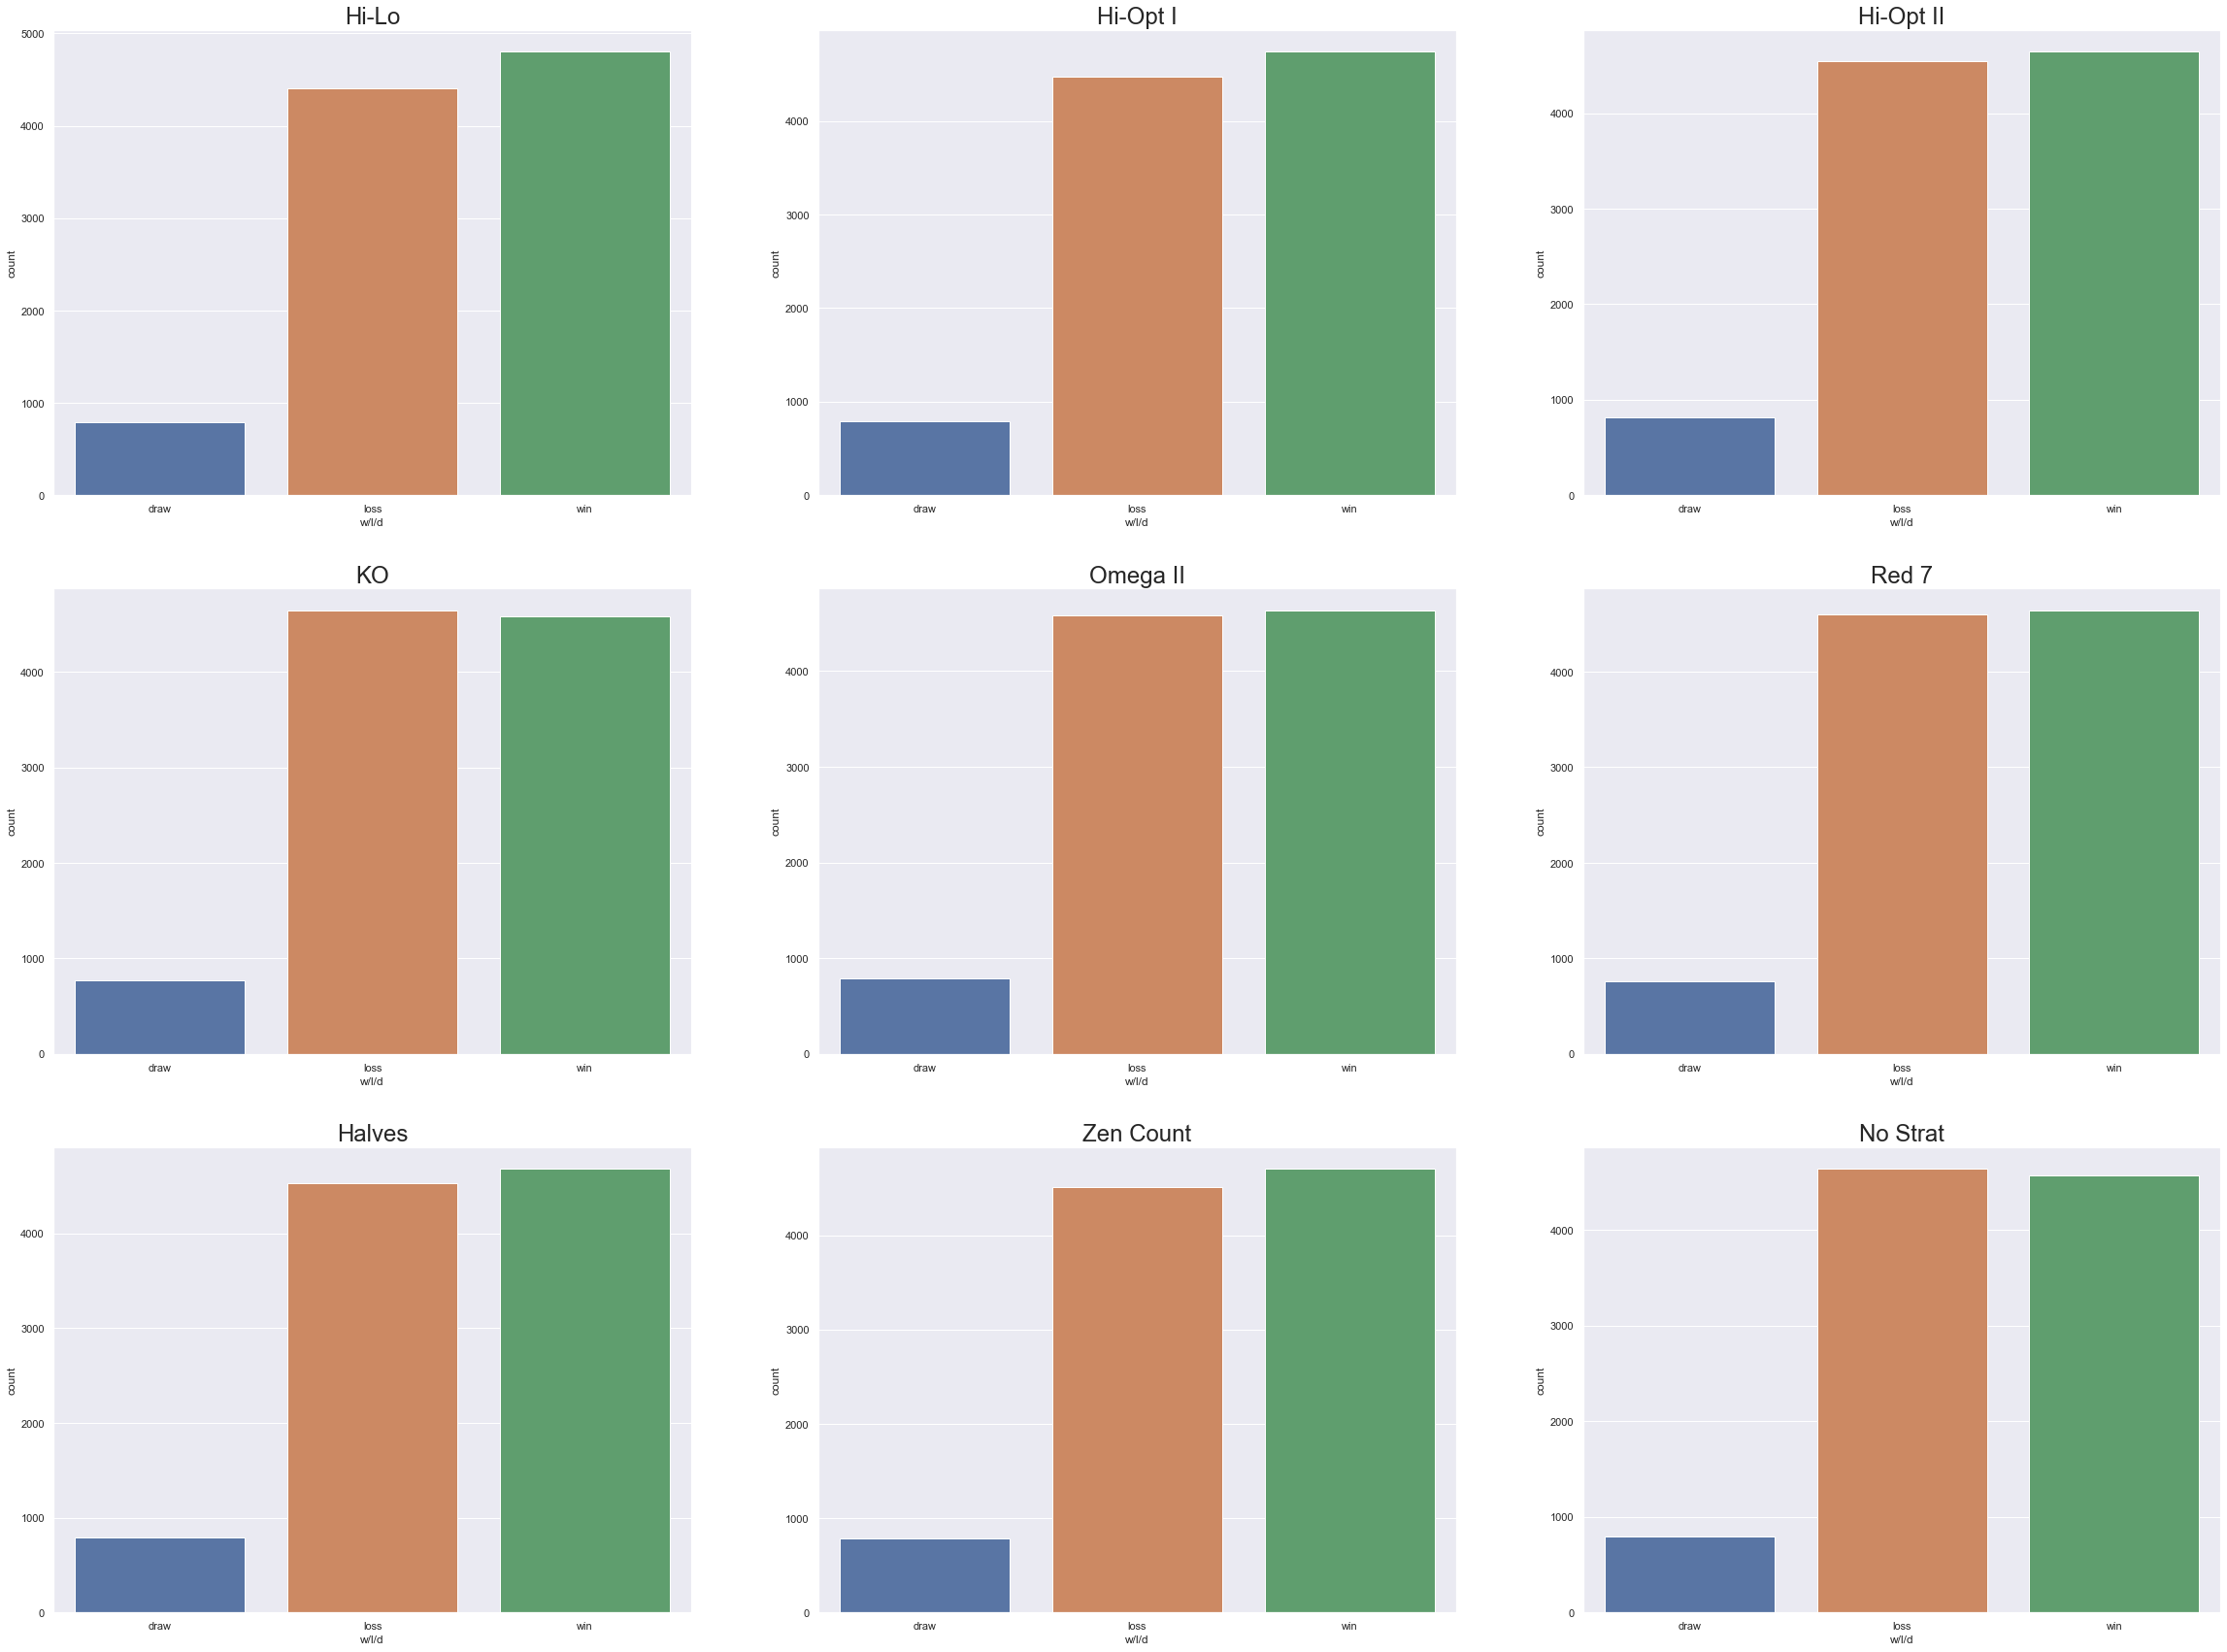

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import csv
import collections, numpy

df_hilo = df[df['strategy'] == 'Hi-Lo']
num_wins = df_hilo['w/l/d'].to_list().count('win')
num_wins += df_hilo['w/l/d'].to_list().count('draw')
num_losses = df_hilo['w/l/d'].to_list().count('loss')
print('\nHI-LO WIN/LOSE RATIO:',num_wins/num_losses,'\n\n')

df_hiopt1 = df[df['strategy'] == 'Hi-Opt I']
num_wins = df_hiopt1['w/l/d'].to_list().count('win')
num_wins += df_hiopt1['w/l/d'].to_list().count('draw')
num_losses = df_hiopt1['w/l/d'].to_list().count('loss')
print('\nHI-OPT I WIN/LOSE RATIO:',num_wins/num_losses,'\n\n')

df_hiopt2 = df[df['strategy'] == 'Hi-Opt II']
num_wins = df_hiopt2['w/l/d'].to_list().count('win')
num_wins += df_hiopt2['w/l/d'].to_list().count('draw')
num_losses = df_hiopt2['w/l/d'].to_list().count('loss')
print('\nHI-OPT II WIN/LOSE RATIO:',num_wins/num_losses,'\n\n')

df_ko = df[df['strategy'] == 'KO']
num_wins = df_ko['w/l/d'].to_list().count('win')
num_wins += df_ko['w/l/d'].to_list().count('draw')
num_losses = df_ko['w/l/d'].to_list().count('loss')
print('\nKO WIN/LOSE RATIO:',num_wins/num_losses,'\n\n')

df_omega2 = df[df['strategy'] == 'Omega II']
num_wins = df_omega2['w/l/d'].to_list().count('win')
num_wins += df_omega2['w/l/d'].to_list().count('draw')
num_losses = df_omega2['w/l/d'].to_list().count('loss')
print('\nOMEGA II WIN/LOSE RATIO:',num_wins/num_losses,'\n\n')

df_red7 = df[df['strategy'] == 'Red 7']
num_wins = df_red7['w/l/d'].to_list().count('win')
num_wins += df_red7['w/l/d'].to_list().count('draw')
num_losses = df_red7['w/l/d'].to_list().count('loss')
print('\nRED 7 WIN/LOSE RATIO:',num_wins/num_losses,'\n\n')

df_halves = df[df['strategy'] == 'Halves']
num_wins = df_halves['w/l/d'].to_list().count('win')
num_wins += df_halves['w/l/d'].to_list().count('draw')
num_losses = df_halves['w/l/d'].to_list().count('loss')
print('\nHALVES WIN/LOSE RATIO:',num_wins/num_losses,'\n\n')

df_zen = df[df['strategy'] == 'Zen Count']
num_wins = df_zen['w/l/d'].to_list().count('win')
num_wins += df_zen['w/l/d'].to_list().count('draw')
num_losses = df_zen['w/l/d'].to_list().count('loss')
print('\nZEN COUNT WIN/LOSE RATIO:',num_wins/num_losses,'\n\n')

df_nostrat = df[df['strategy'] == 'No Strategy']
num_wins = df_nostrat['w/l/d'].to_list().count('win')
num_wins += df_nostrat['w/l/d'].to_list().count('draw')
num_losses = df_nostrat['w/l/d'].to_list().count('loss')
print('\nNO STRATEGY WIN/LOSE RATIO:',num_wins/num_losses,'\n\n')


fig , ax = plt.subplots(nrows = 3, ncols = 3)

sns.countplot(data = df_hilo, x = 'w/l/d', ax=ax[0][0], order=df_hilo.sort_values(by=['w/l/d'], inplace=True))
ax[0][0].set_title('Hi-Lo',fontdict= {'fontsize': 24})

sns.countplot(data = df_hiopt1, x = 'w/l/d', ax=ax[0][1], order=df_hiopt1.sort_values(by=['w/l/d'], inplace=True))
ax[0][1].set_title('Hi-Opt I',fontdict= {'fontsize': 24})

sns.countplot(data = df_hiopt2, x = 'w/l/d', ax=ax[0][2], order=df_hiopt2.sort_values(by=['w/l/d'], inplace=True))
ax[0][2].set_title('Hi-Opt II',fontdict= { 'fontsize': 24})

sns.countplot(data = df_ko, x = 'w/l/d', ax=ax[1][0], order=df_ko.sort_values(by=['w/l/d'], inplace=True))
ax[1][0].set_title('KO',fontdict= { 'fontsize': 24})

sns.countplot(data = df_omega2, x = 'w/l/d', ax=ax[1][1], order=df_omega2.sort_values(by=['w/l/d'], inplace=True))
ax[1][1].set_title('Omega II',fontdict= { 'fontsize': 24})

sns.countplot(data = df_red7, x = 'w/l/d', ax=ax[1][2], order=df_red7.sort_values(by=['w/l/d'], inplace=True))
ax[1][2].set_title('Red 7',fontdict= { 'fontsize': 24})

sns.countplot(data = df_halves, x = 'w/l/d', ax=ax[2][0], order=df_halves.sort_values(by=['w/l/d'], inplace=True))
ax[2][0].set_title('Halves',fontdict= { 'fontsize': 24})

sns.countplot(data = df_zen, x = 'w/l/d', ax=ax[2][1], order=df_zen.sort_values(by=['w/l/d'], inplace=True))
ax[2][1].set_title('Zen Count',fontdict= { 'fontsize': 24})

sns.countplot(data = df_nostrat, x = 'w/l/d', ax=ax[2][2], order=df_nostrat.sort_values(by=['w/l/d'], inplace=True))
ax[2][2].set_title('No Strat',fontdict= { 'fontsize': 24})



sns.set(rc={'figure.figsize':(40,30)})

Podemos observar aqui que a estratégia que mais trouxe vitórias para nós foi a Hi-Low! Com uma razão (Vitória+empate)/Derrota de 1.26860 .
Será esta a estratégia que devemos adotar?
Quais serão as mãos mais vencedoras?
Será que ganho mais quando começo com uma mão boa ou quando eu compro uma carta?